In [1]:
import numpy as np
import torch
import IPython.display as ipd
import audio_classifier_visualizer as acv


In [10]:
sample_rate = 44100  # Sample rate in Hz
duration = 10  # Total duration in seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)  # Time array

# Frequencies for the scale from middle C (261.63 Hz) to the octave above (523.25 Hz)
frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]
waveform = np.concatenate([0.5 * np.sin(2 * np.pi * f * t[:int(sample_rate * 8 / len(frequencies))]) for f in frequencies])
waveform = np.concatenate([waveform, np.zeros(int(sample_rate * 2))])  # Add 2 seconds of silence at the end
lower_c_frequency = 130.81  # Frequency for lower C (C2)
chirp_frequency = np.linspace(lower_c_frequency, 20000, int(sample_rate * duration))  # Frequency array for chirp
chirp_waveform = 2 * np.sin(2 * np.pi * chirp_frequency * t)  # Chirp waveform from lower C to high C
waveform += chirp_waveform  # Add the chirp waveform to the existing waveform
noise_waveform = np.random.normal(0, 0.5, waveform.shape)  # Generate noise with mean 0 and standard deviation 0.1
waveform += noise_waveform  # Add noise to the waveform

ipd.Audio(waveform,rate=sample_rate)


features_per_second = 2
features = np.concatenate([np.array([note+1 for x in range(features_per_second)]) for note in range(len(frequencies))])
features = np.concatenate([features, np.zeros(int(features_per_second * 2))])
features.shape

logits = np.zeros((features_per_second * 10, 9))  # Initialize logits with zeros
for i in range(8):
    logits[i * features_per_second:(i + 1) * features_per_second, i] = 1.0  # Set the highest value for each note in its corresponding second
logits[features_per_second * 8:features_per_second * 10, 8] = 1.0
noise = np.random.normal(0, 0.1, logits.shape)  # Generate noise with mean 0 and standard deviation 0.1
logits += noise  # Add noise to the logits
logits *= 10

print(features.shape,logits.shape)

import torch
logits_tensor = torch.tensor(logits)
probabilities = torch.softmax(logits_tensor, dim=1).detach()

labels = ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C', 'silence']

#logits


(20,) (20, 9)


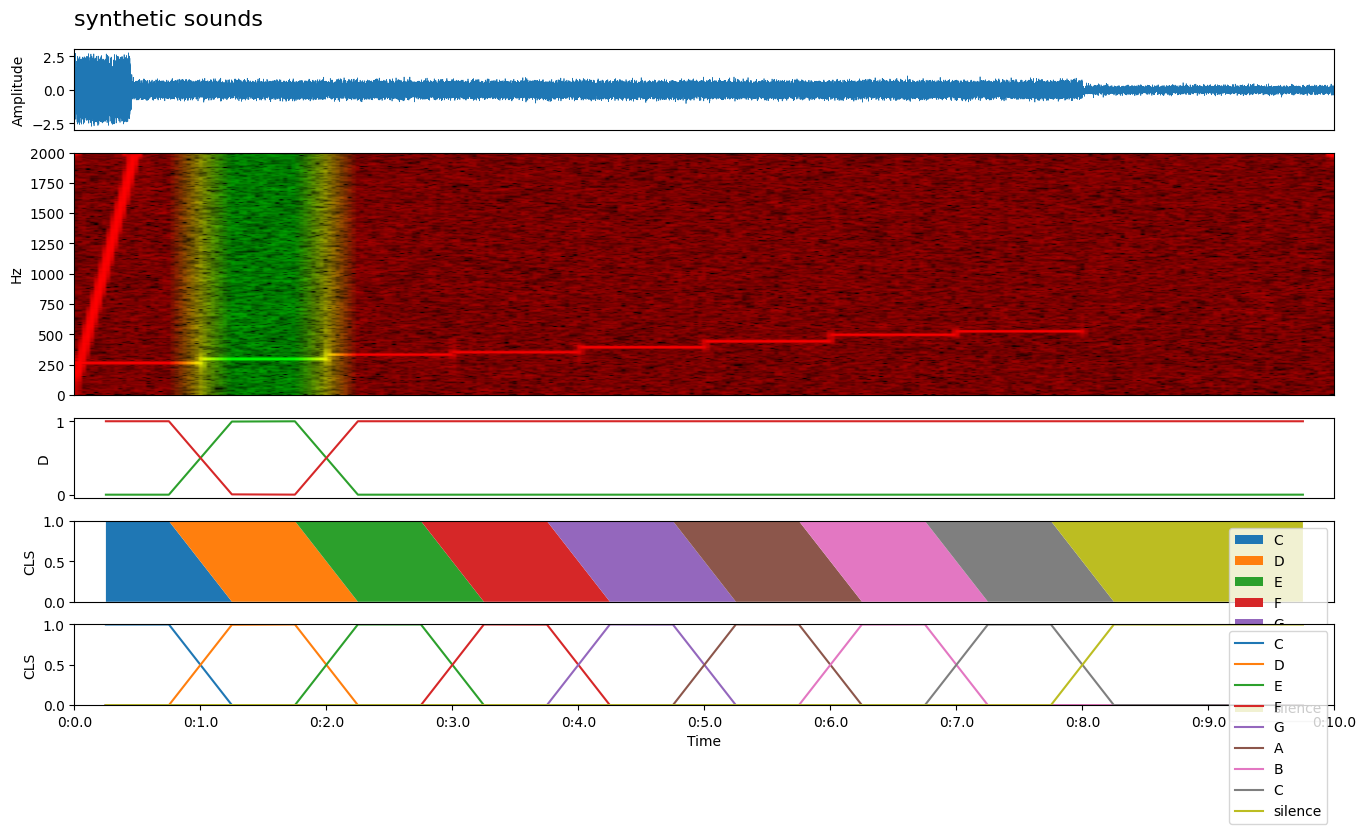

In [11]:
audio_file_processor = acv.AudioFileProcessor()

demo_labels = [
    acv.RavenLabel(bt=0, et=1, lf=200, hf=300, notes="C Note", score=0.95),
    acv.RavenLabel(bt=1, et=2, lf=250, hf=350, notes="D Note", score=0.85)
]

audio_file_visualizer = acv.AudioFileVisualizer(y=waveform,
                                                sr=sample_rate,
                                                resample_to_sr=4000,
                                                start_time=0, end_time=15,
                                                feature_rate=features_per_second,
                                                class_probabilities=probabilities,
                                                n_fft=512,
                                                label_boxes=[],
                                                class_labels=labels,)

title = "synthetic sounds"
audio_file_visualizer.visualize_audio_file_fragment(title, width=14, height=8).show()


In [4]:
def interpolate_1d_tensor(self, input_tensor: torch.Tensor, target_length: int) -> torch.Tensor:
    z = input_tensor[None, None, :]
    return torch.nn.functional.interpolate(z, target_length,mode="linear")[0][0]

interpolate_1d_tensor(None, torch.tensor([1.0,2,3,4,5]),10)

tensor([1.0000, 1.2500, 1.7500, 2.2500, 2.7500, 3.2500, 3.7500, 4.2500, 4.7500,
        5.0000])

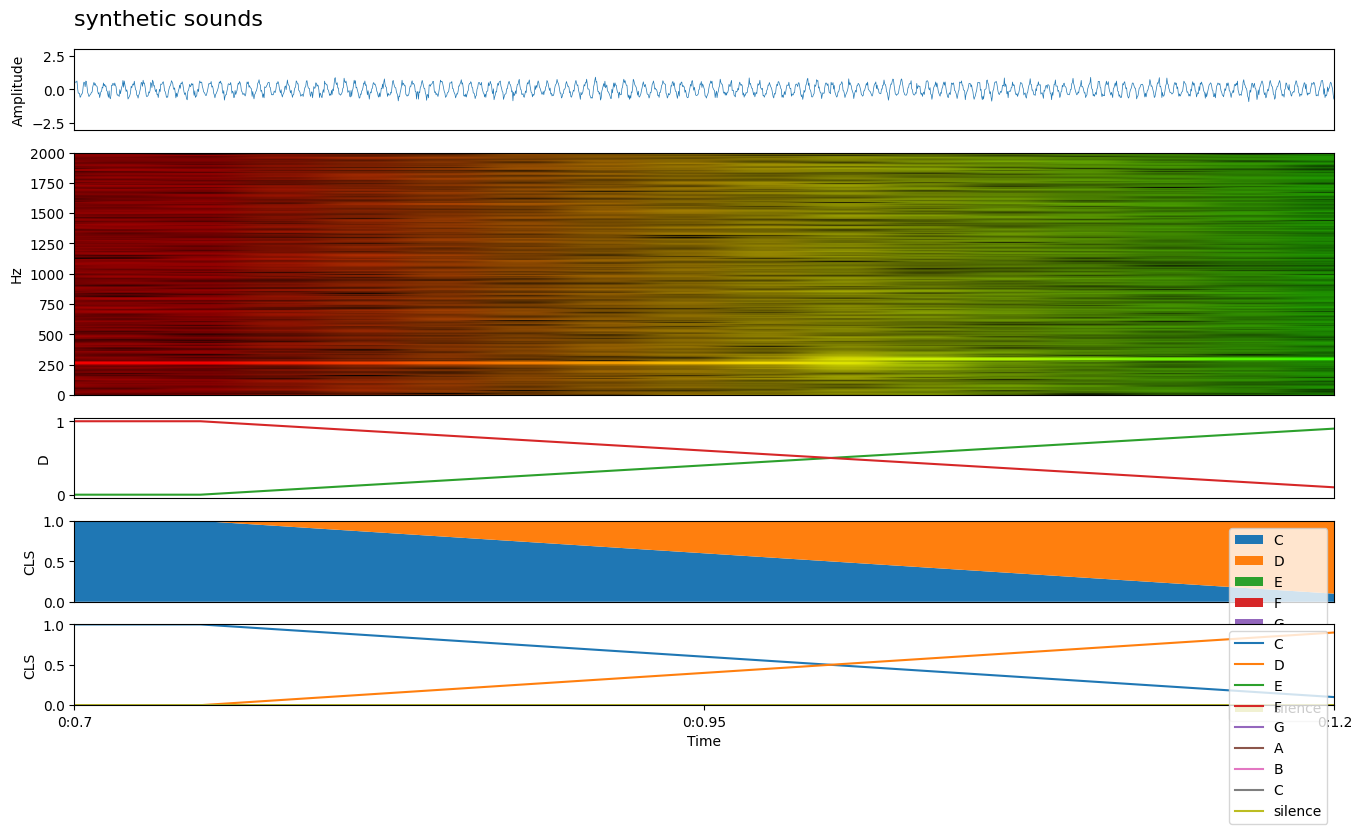

In [5]:
audio_file_visualizer.visualize_audio_file_fragment(title, start_time = 0.7, end_time=1.2, width=14, height=8).show()
